In [1]:
import numpy as np
import scipy
import sympy as sym
import matplotlib
sym.init_printing()

## Integrate

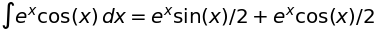

In [2]:
x = sym.symbols('x')
a = sym.Integral(sym.cos(x)*sym.exp(x), x)
sym.Eq(a, a.doit())

## Derivative

In [3]:
y = x**2+4*x
y

In [4]:
sym.plot(y, y.diff(x,1), y.diff(x, 2))

<Figure size 640x480 with 1 Axes>

In [5]:
a = sym.symbols('a')
x = sym.symbols('x')
y = sym.Function('y')(x)
z = sym.Function('z')(y)
sym.Eq(z.diff(y)*y.diff(x)*a, z.diff(x))

  d        ⎛ d        ⎞│          d        ⎛ d        ⎞│       
a⋅──(y(x))⋅⎜───(z(ξ₂))⎟│        = ──(y(x))⋅⎜───(z(ξ₂))⎟│       
  dx       ⎝dξ₂       ⎠│ξ₂=y(x)   dx       ⎝dξ₂       ⎠│ξ₂=y(x)

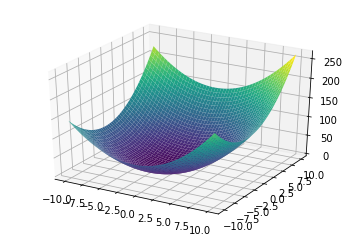

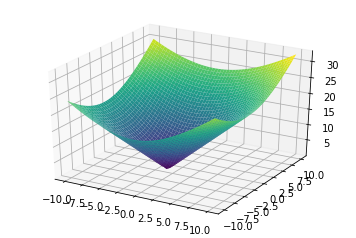

In [5]:
x, y = sym.symbols('x y')
z = x**2+2*x+y**2+4*y+4
dzx = z.diff(x)
dzy = z.diff(y)
sym.plotting.plot3d(z, (x, -10, 10), (y, -10, 10))
sym.plotting.plot3d(sym.sqrt(dzx**2 +  dzy**2), (x, -10, 10), (y, -10, 10))

In [6]:
x, y = sym.symbols('x y')
z = x**2+2*x+y**2+4*y+4
z

In [7]:
(z.diff(x),z.diff(y))

In [39]:
x, y, a, b = sym.symbols('x y a b')
z = (a*x + b - y) **2 
z.diff(a)
z.diff(a).diff(a)

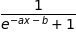

In [14]:
import math
x, y, a, b = sym.symbols('x y a b')
z = 1/ (1 + sym.exp(-(a* x + b)))
z

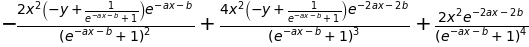

In [16]:
import math
x, y, a, b = sym.symbols('x y a b')
z = 1/ (1 + sym.exp(-(a* x + b)))
c = (z - y)**2
c.diff(a).diff(a)

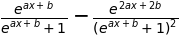

In [38]:
import math
x, y, a, b = sym.symbols('x y a b')
h = 1/ (1 + sym.exp(-(a* x + b)))
#c = y * sym.log(h) + (1-y) * sym.log(1-h)
c = -y * (a*x + b) + sym.log(1 + sym.exp(a*x + b))
c.diff(b).diff(b)

$$lim_{x\rightarrow 0}{\frac{sin(x)}{x}}$$

In [ ]:
x, y = sym.symbols('x y')
sym.limit(sym.sin(x)/x,x,0)

## Series

In [1]:
import numpy as np
import scipy
import sympy as sym
import matplotlib
sym.init_printing()
x, y = sym.symbols('x y')
d = 0
z=sym.series((x-3)*(x+1)*(x+4)*(x-4)*x,x,x0=d,n=4)
z

In [ ]:
sym.plot(48*x+32*x**2-19*x**3,(x-3)*(x+1)*(x+4)*(x-4)*x,(x,-4,4))

## 三角函数与傅里叶变换

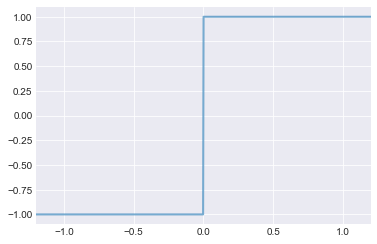

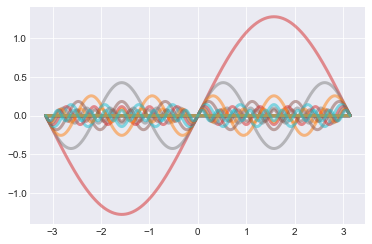

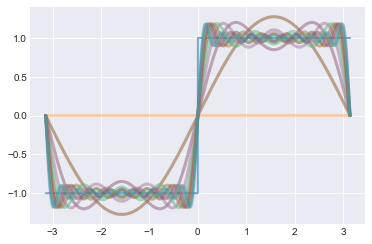

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('seaborn-darkgrid')
x = np.linspace(-np.pi,np.pi,2000)
y = np.ones_like(x)
dx = np.mean(x[1:]-x[:-1])
y[:1000]=-1
plt.figure(1)
plt.plot(x, y, lw=2, alpha=.6)
plt.xlim([-1.2,1.2])

def par(n):
    an=1/np.pi*np.trapz(y*np.cos(x*n),dx=dx)
    bn=1/np.pi*np.trapz(y*np.sin(x*n),dx=dx)
    return an,bn
plt.figure(2)
for itr in range(20):
    an, bn = par(itr)
    plt.plot(x,an*np.cos(itr*x), lw=3, alpha=.5)
    plt.plot(x,bn*np.sin(itr*x), lw=3, alpha=.5)
plt.figure(3)
plt.plot(x, y, lw=2, alpha=.6)
sums = np.zeros_like(x)
for itr in range(20):
    an, bn = par(itr)
    sums[:] += an*np.cos(itr*x)+bn*np.sin(itr*x)
    plt.plot(x,sums, lw=3, alpha=.3)
plt.show()

## 曲线拟合

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import matplotlib as mpl
mpl.style.use('seaborn-darkgrid')

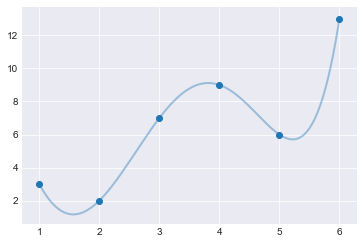

In [4]:
#待拟合的函数，x是变量，p是参数
def func(x, p):
    a, b, c, d, e, f = p
    return a+b*x+c*x**2+d*x**3+e*x**4+f*x**5

#计算真实数据和拟合数据之间的误差，p是待拟合的参数，x和y分别是对应的真实数据
def error(p, x, y):
    return func(x, p) - y

#一组真实数据，在a=2, b=1的情况下得出
x1 = np.array([1, 2, 3, 4, 5, 6], dtype=float)
y1 = np.array([3, 2, 7, 9, 6, 13], dtype=float)

#调用拟合函数，第一个参数是需要拟合的差值函数，第二个是拟合初始值，第三个是传入函数的其他参数
r = leastsq(error, [1, 1, 1, 1, 1, 1], args=(x1, y1))

#打印结果，r[0]存储的是拟合的结果，r[1]、r[2]代表其他信息
x = np.linspace(1,6,1000)
y = func(x, r[0])
plt.plot(x,y, lw=2, alpha=0.4)
plt.scatter(x1, y1)
plt.show()